# Python Data isualisation

## 1. Load data

In [2]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

from sklearn import datasets

In [4]:
df = sns.load_dataset('tips')

In [3]:
df.shape

(244, 7)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## 2. Compare

### 2.1 Density (Numeric distribution) 

smoker
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
No     AxesSubplot(0.125,0.125;0.775x0.755)
Name: tip, dtype: object

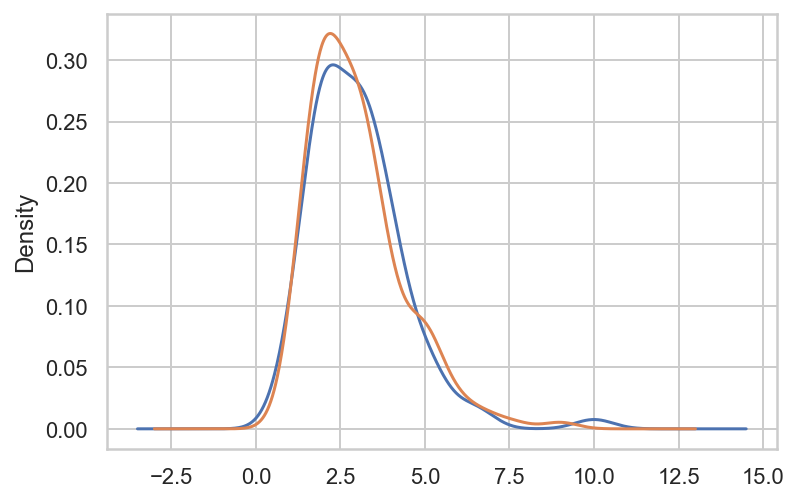

In [50]:
df.groupby('smoker')['tip'].plot(kind='kde')


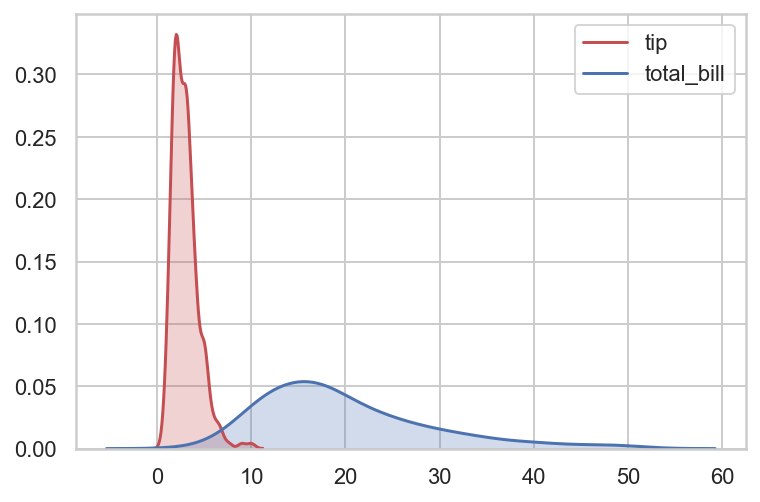

In [8]:
p1 = sns.kdeplot(df['tip'],shade=True,color="r")
p2 = sns.kdeplot(df['total_bill'],shade=True,color="b")


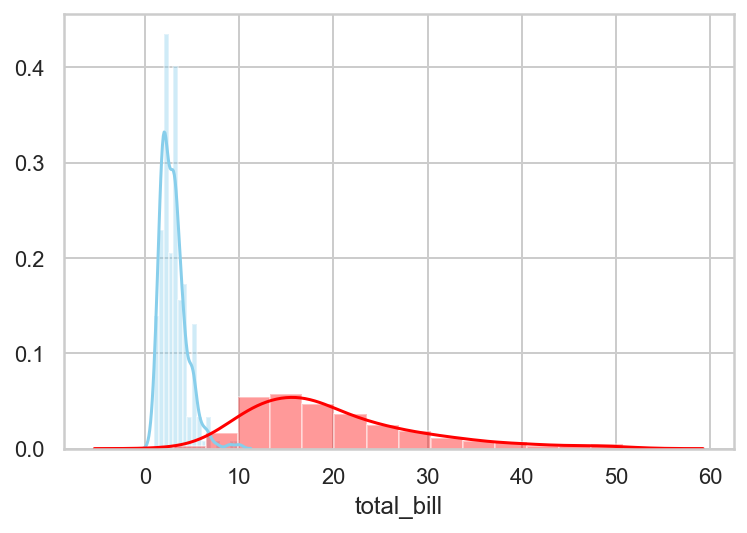

In [9]:
sns.distplot( df["tip"] , color="skyblue", label="Tip")
sns.distplot( df["total_bill"] , color="red", label="Bill")


[Text(0.5, 0, 'Sun')]

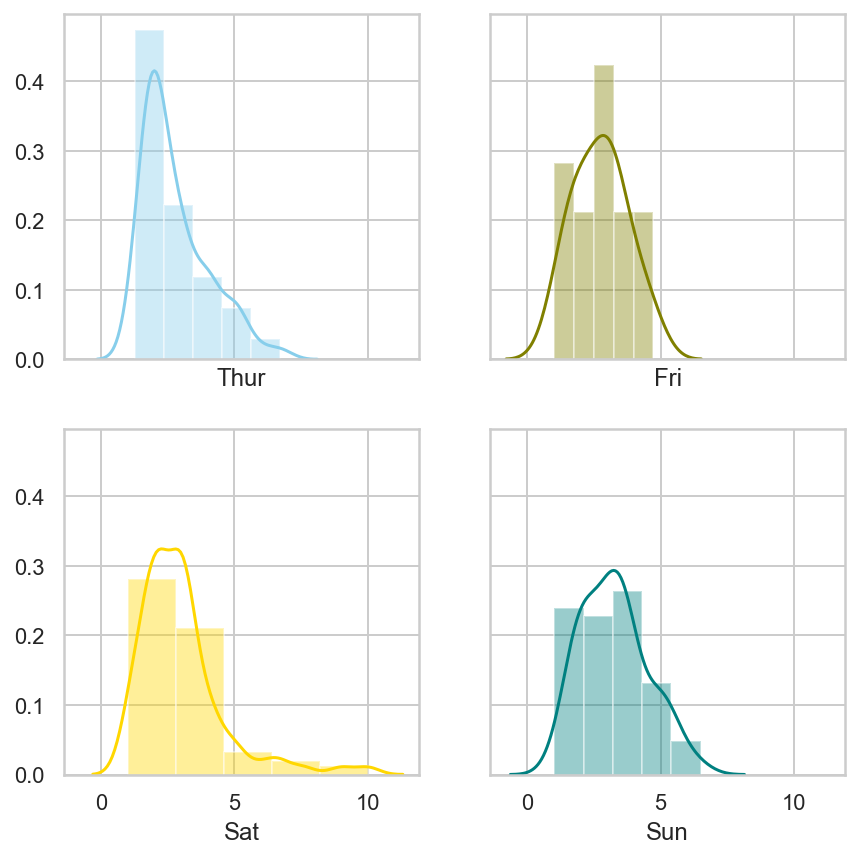

In [10]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey= True)

sns.distplot( df.loc[df['day']=='Thur',['tip']] , color="skyblue", bins= 5,ax=axes[0, 0]).set(xlabel='Thur')
sns.distplot( df.loc[df['day']=='Fri',['tip']] , color="olive",bins= 5, ax=axes[0, 1]).set(xlabel='Fri')
sns.distplot( df.loc[df['day']=='Sat',['tip']] , color="gold", bins= 5,ax=axes[1, 0]).set(xlabel='Sat')
sns.distplot( df.loc[df['day']=='Sun',['tip']] , color="teal",bins= 5, ax=axes[1, 1]).set(xlabel='Sun')



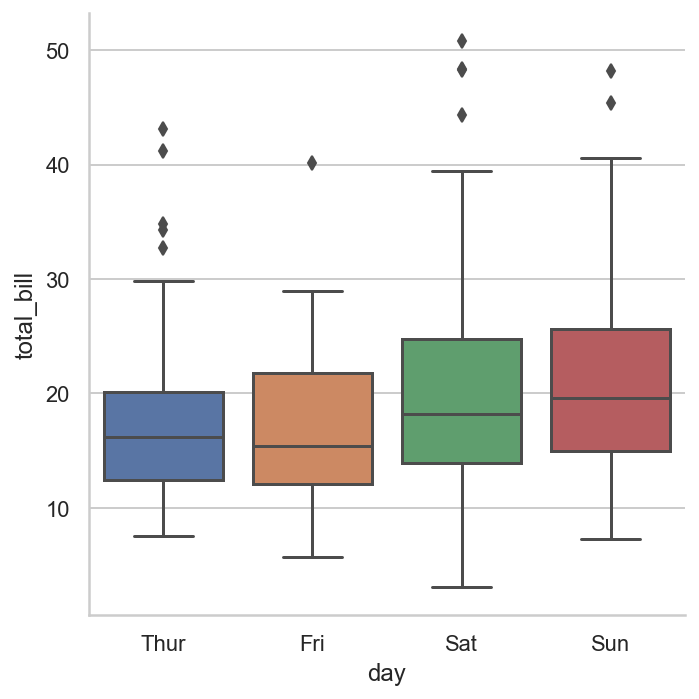

In [48]:
sns.catplot(x="day", y="total_bill", kind="box", data=df);

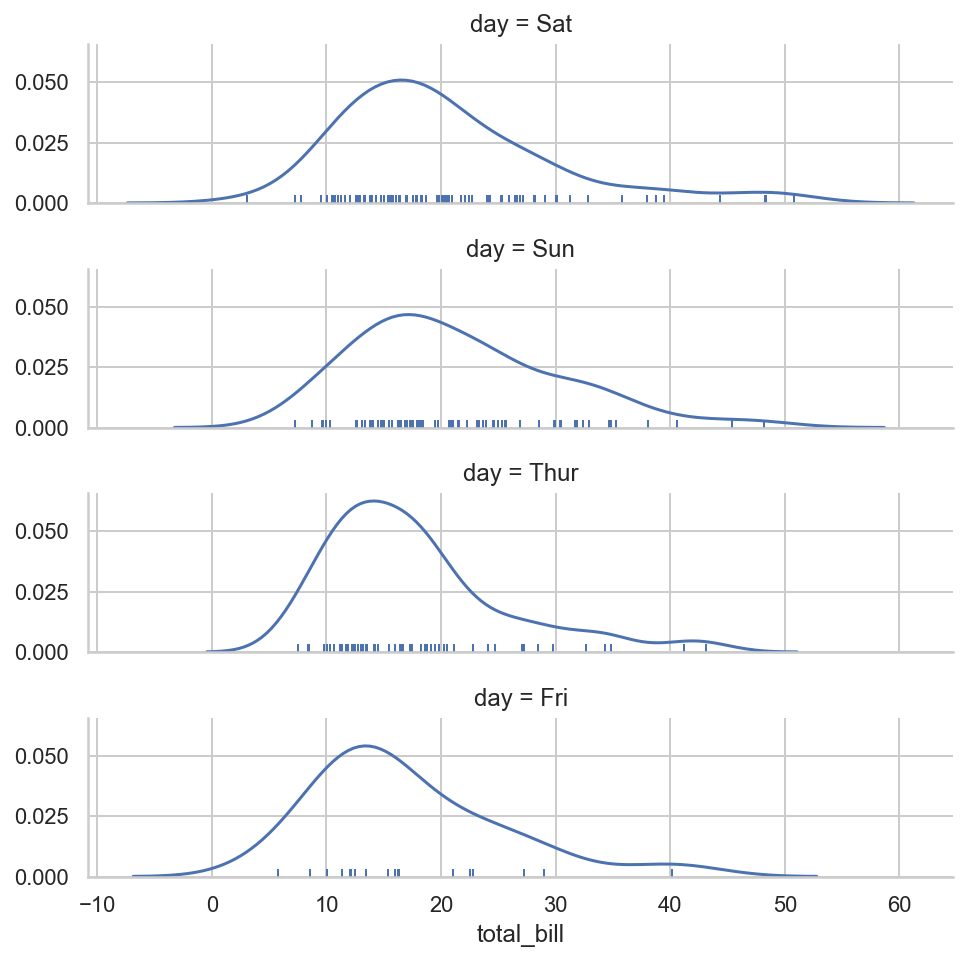

In [51]:
ordered_days = df.day.value_counts().index
g = sns.FacetGrid(df, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

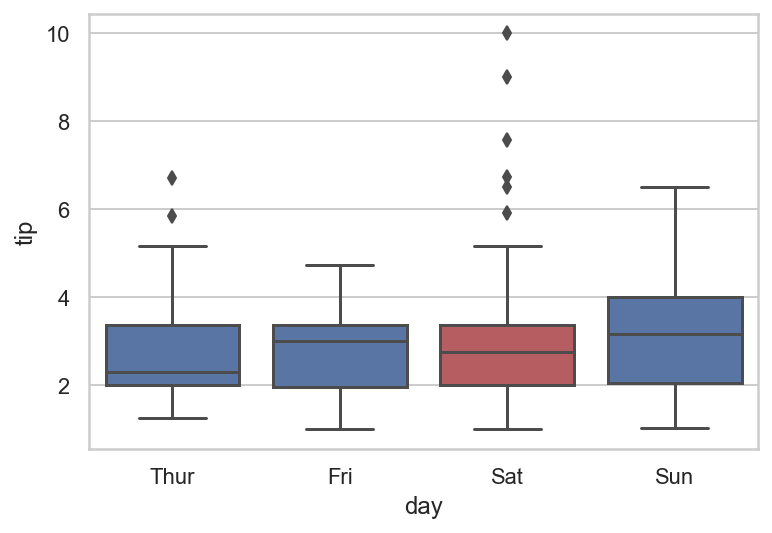

In [11]:
my_pal = {day: "r" if day == "Sat" else "b" for day in df['day'].unique()}

sns.boxplot(x=df['day'],y=df['tip'],palette=my_pal)

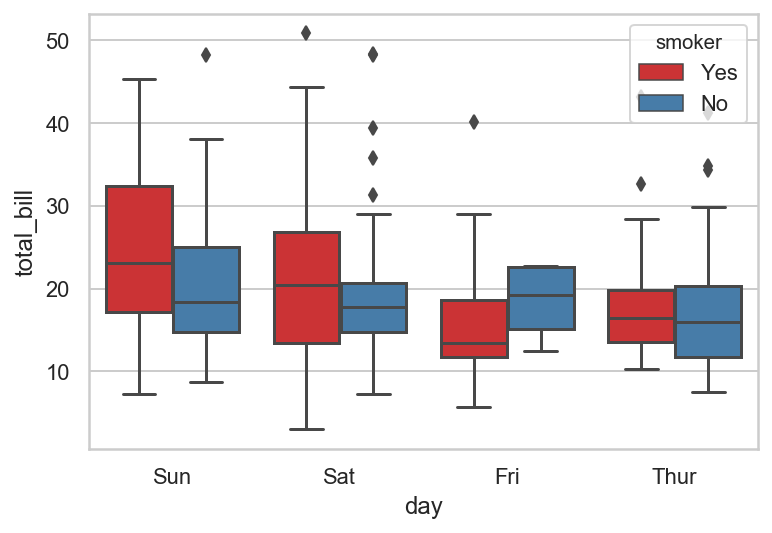

In [12]:
sns.boxplot(x='day',y='total_bill',hue='smoker' \
            ,data=df,palette='Set1' \
            ,order = ['Sun','Sat','Fri','Thur'])

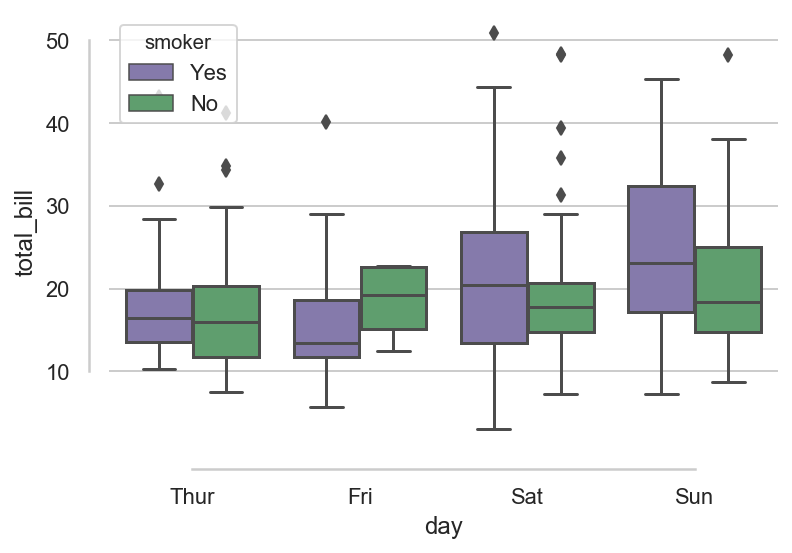

In [29]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

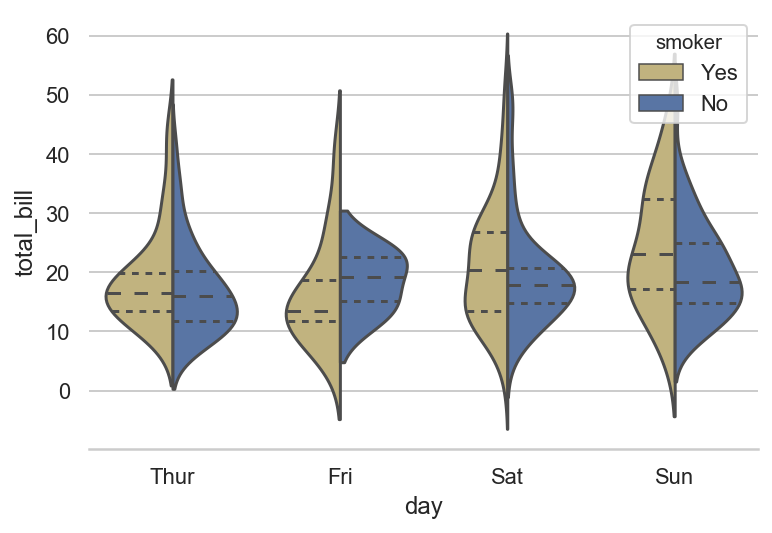

In [31]:

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=df)
sns.despine(left=True)

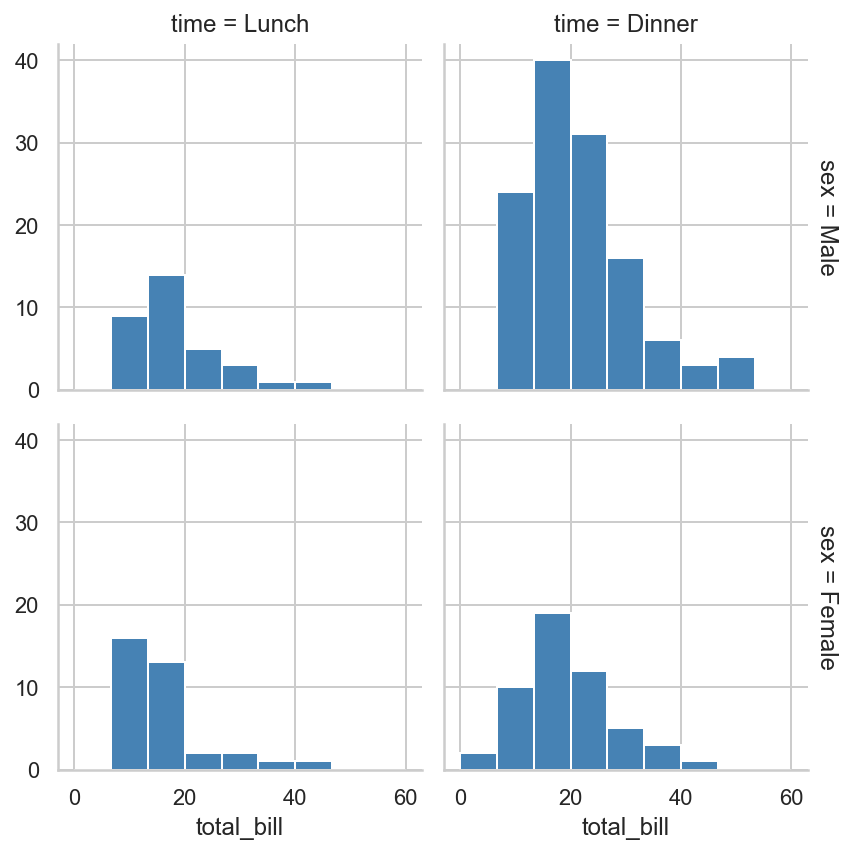

In [34]:
g = sns.FacetGrid(df, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 10)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

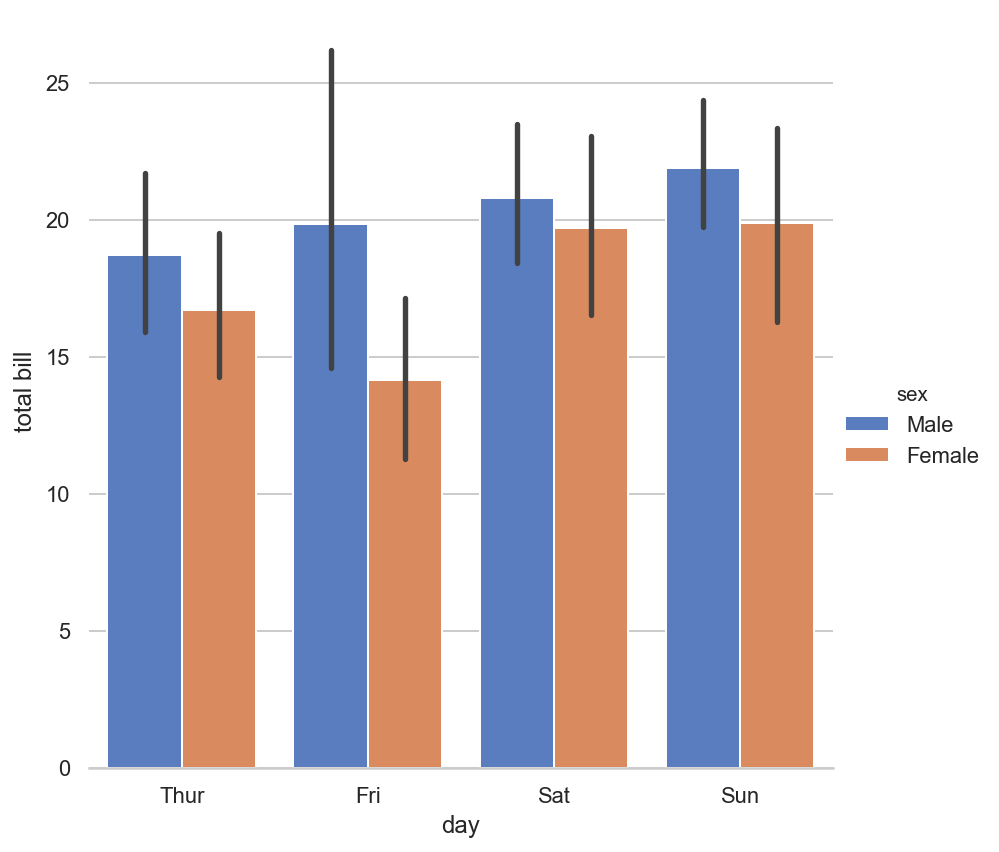

In [36]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="day", y="total_bill", hue="sex", data=df,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("total bill")

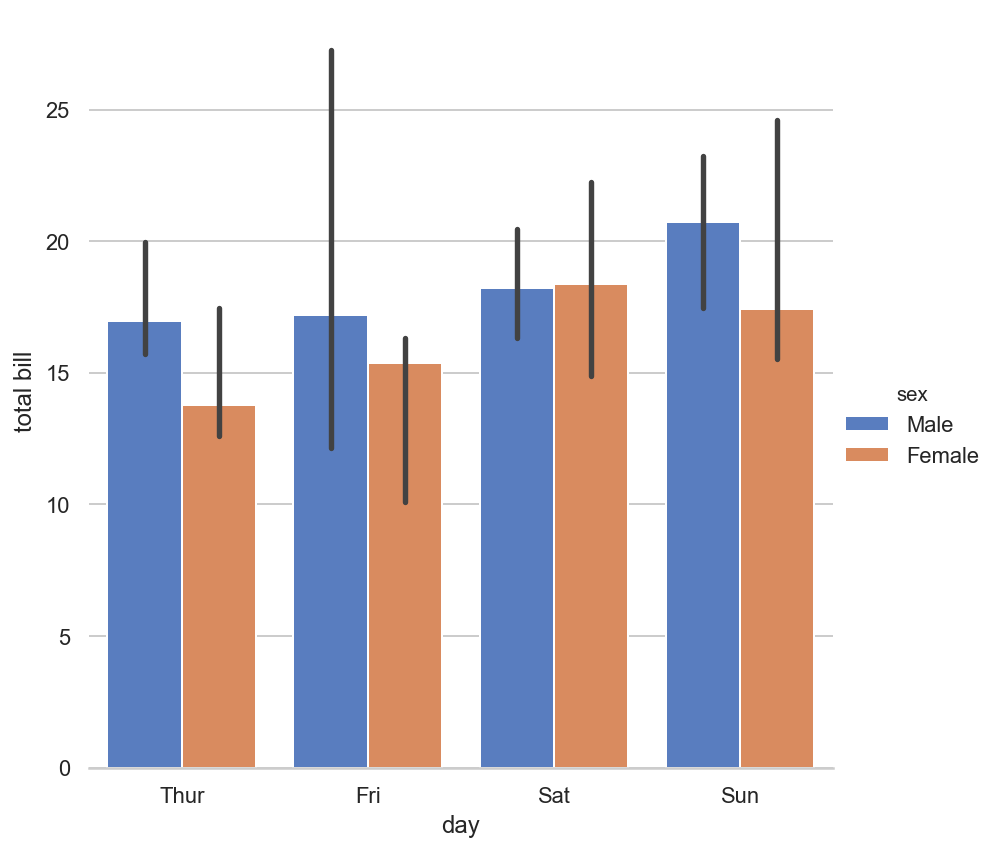

In [5]:
g = sns.catplot(x="day", y="total_bill", hue="sex", data=df,
                height=6, kind="bar", palette="muted",estimator=np.median)
g.despine(left=True)
g.set_ylabels("total bill")

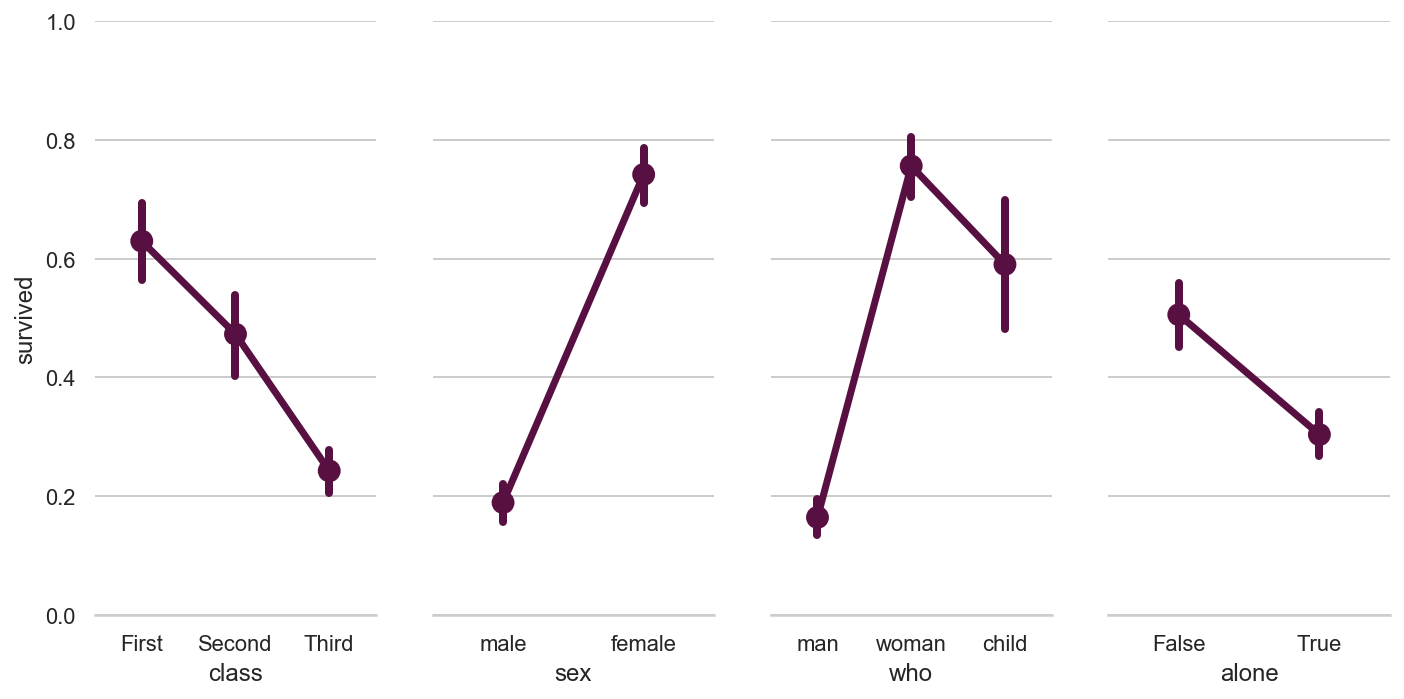

In [45]:
sns.set(style="whitegrid")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(df_titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

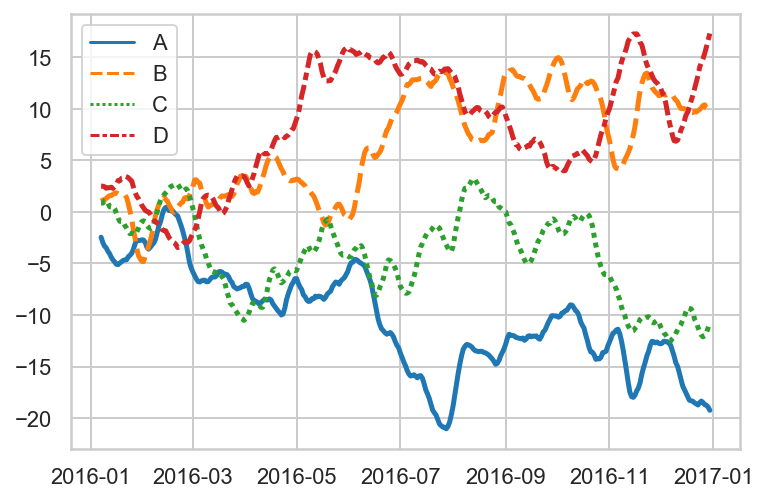

In [47]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

## 3. Relationship 

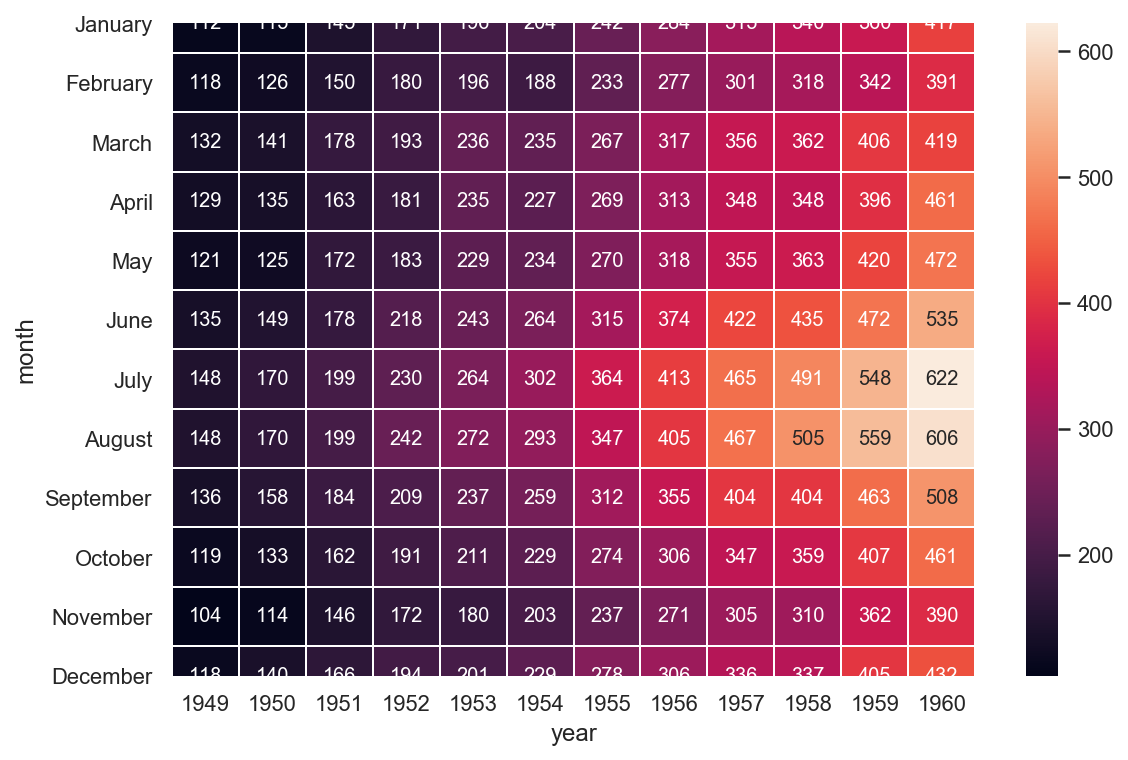

In [37]:

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

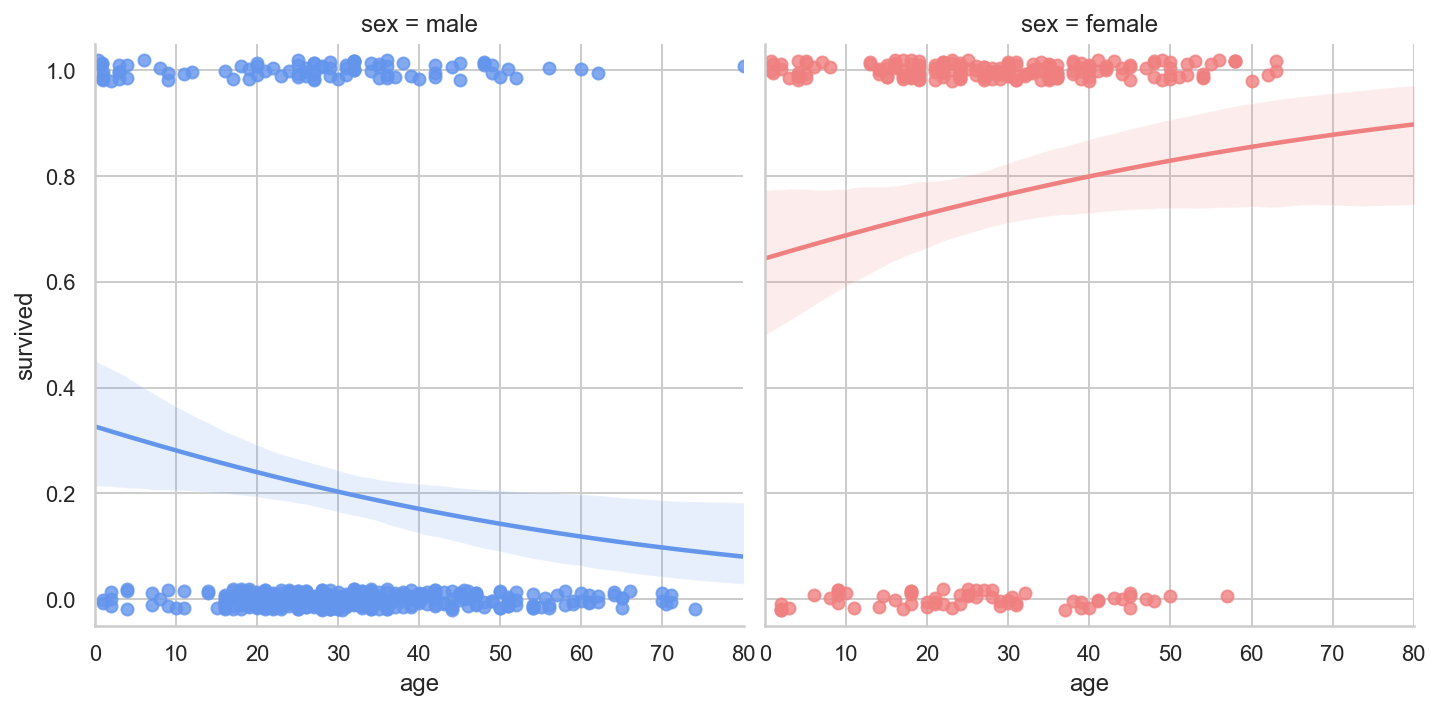

In [43]:
# Load the example Titanic dataset
df_titanic = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival probability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df_titanic,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

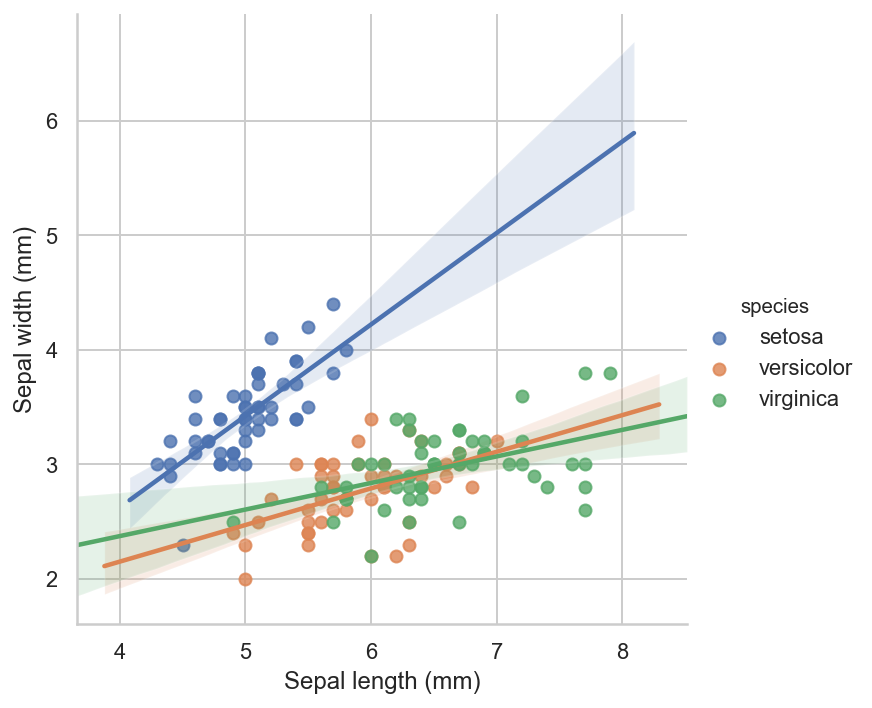

In [44]:
# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               height=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

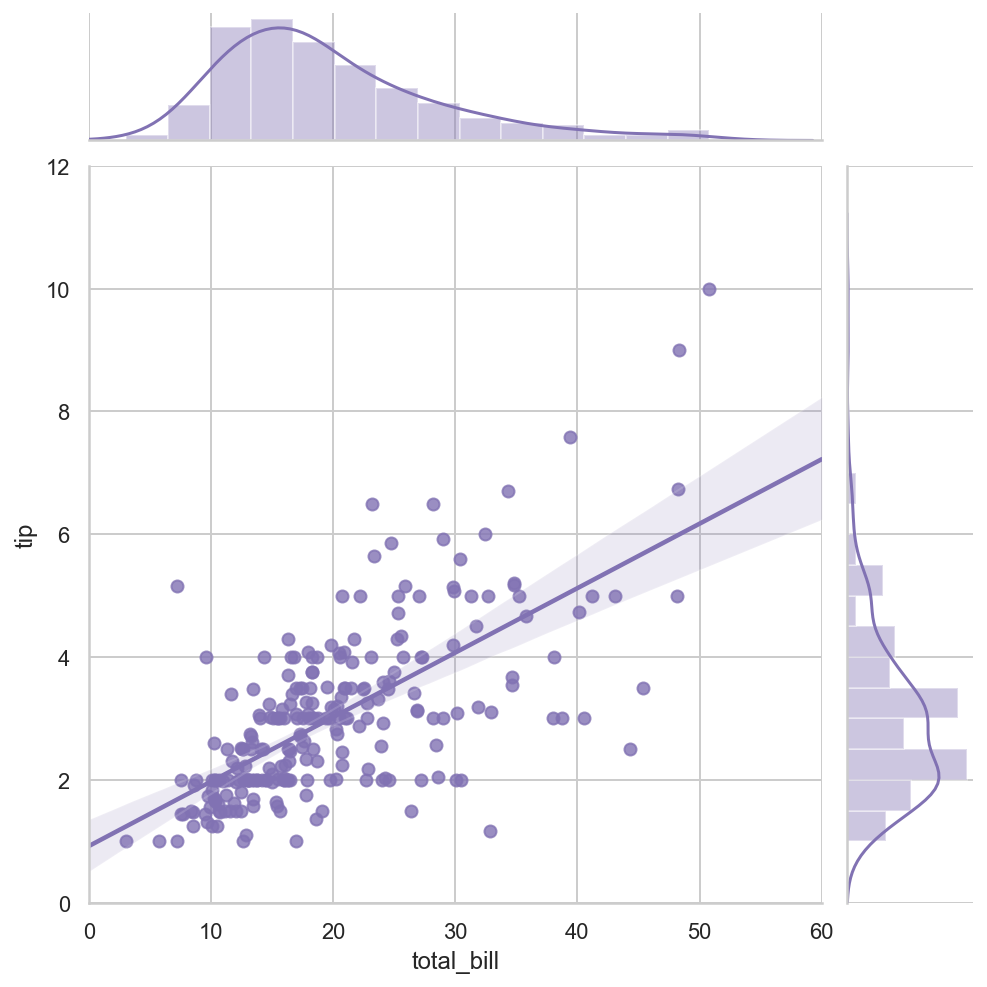

In [46]:
g = sns.jointplot("total_bill", "tip", data=df,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

## 4. Others

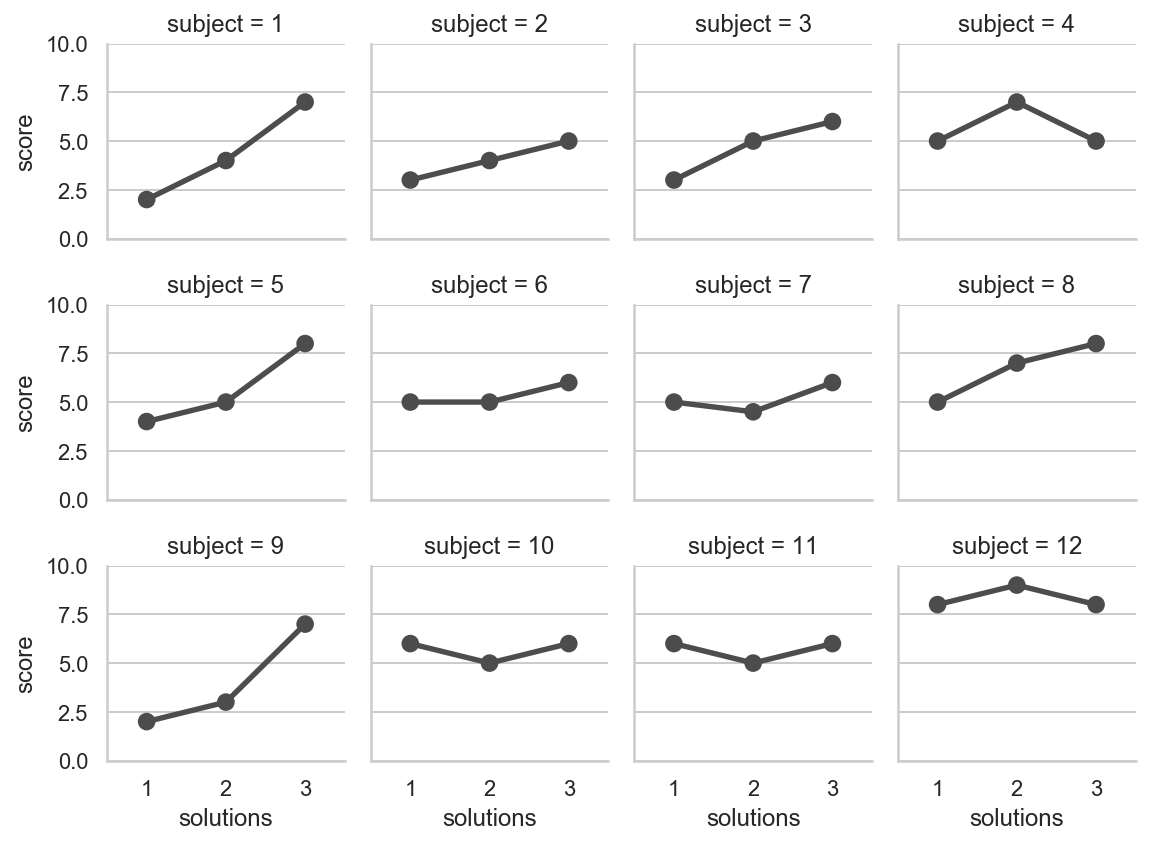

In [52]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

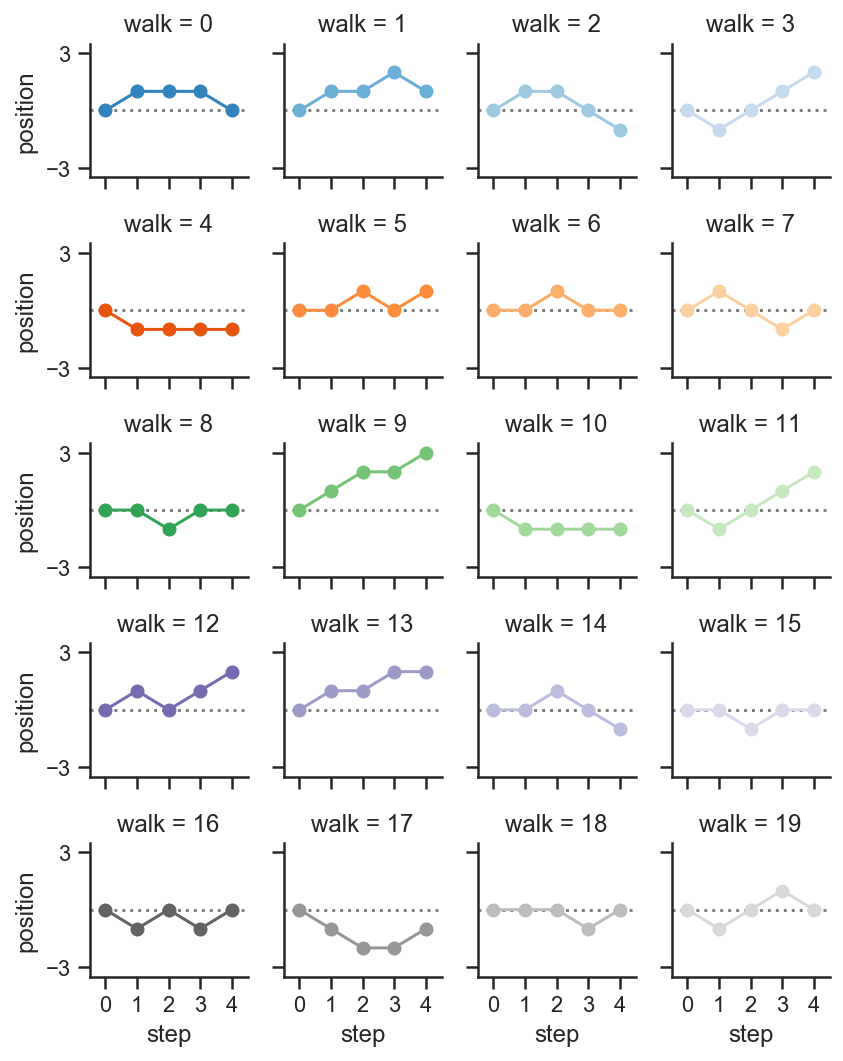

In [54]:

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)